# Iris Dataset Support-vector Machine Classifier

In [128]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

Import the data (copy saved to the repository) and check it is what we expect.

In [225]:
iris = pd.read_csv("iris.csv")

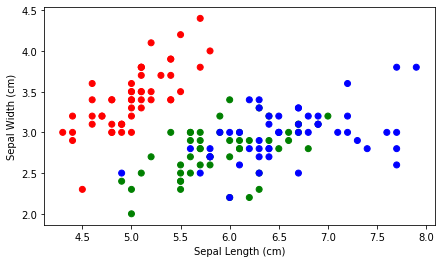

In [226]:
colour_map = {"Iris-setosa": 'red',
             "Iris-virginica": 'blue',
             "Iris-versicolor": 'green'}

plt.figure(figsize=(7,4))
plt.scatter(iris.SepalLengthCm, iris.SepalWidthCm, c=[colour_map[i] for i in iris.Species])

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

Since I want this to be a simple demonstration of Support-vector Machine, I will select to use the red and blue species and remove the two outliers in the bottom left corner to make life easier.

In [227]:
new_iris = pd.concat([iris.iloc[0:50], iris.iloc[100:150]]) #Remove the green species

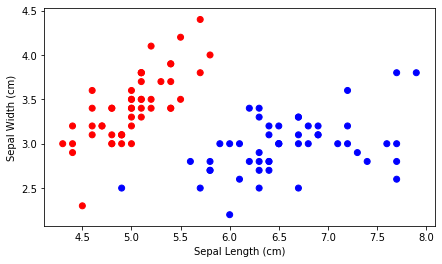

In [228]:
colour_map = {"Iris-setosa": 'red',
             "Iris-virginica": 'blue',
             "Iris-versicolor": 'green'}

plt.figure(figsize=(7,4))
plt.scatter(new_iris.SepalLengthCm, new_iris.SepalWidthCm, c=[colour_map[i] for i in new_iris.Species])

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

In [229]:
#Remove the dodgy data points

#new_iris.SepalLengthCm.value_counts() - verify there is only one instance of Sepal Length = 4.5cm and remove it
new_iris = new_iris[new_iris.SepalLengthCm != 4.5]
#Manually seek out the other outlying point and remove it
new_iris = new_iris[new_iris.Id != 107]

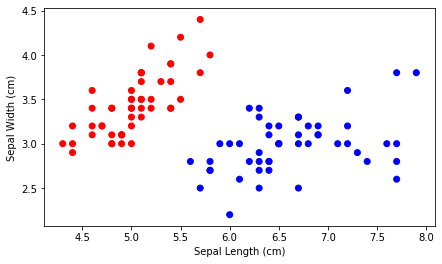

In [230]:
plt.figure(figsize=(7,4))
plt.scatter(new_iris.SepalLengthCm, new_iris.SepalWidthCm, c=[colour_map[i] for i in new_iris.Species])

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

Now I prepare the data for the SVM algorithm. I stack the Sepal Length and Sepal Width variables into a $2 \times 100$ matrix. I convert the species labels into a one-dimensional array with entry $0$ if the corresponding data point is the species 'Iris-setosa' and with entry $1$ if the data point is species 'Iris-viginica'. 

In [232]:
species_list = ['Iris-setosa', 'Iris-virginica']

x_data = np.column_stack((np.asarray(new_iris.SepalLengthCm), np.asarray(new_iris.SepalWidthCm)))
y_data = np.asarray([species_list.index(species) for species in list(np.asarray(new_iris.Species))])

Next I use the ```svm``` module from the ```sklearn``` library to fit a linear support-vector machine to the data ```x-data``` and labels ```y_data```. I then extract the parameters $\alpha, \beta, \gamma$ satisfying 
$$\mathbf{w} \mathbf{x}^T + \gamma = 0,$$ 
where $\mathbf{w} = (\alpha, \beta)$ and $\mathbf{x} = (x,y)$.

In slope-intercept form, we therefore have 
\begin{align}
(\alpha, \beta) (x, y)^T + \gamma = 0 &\Rightarrow \alpha x + \beta y = -\gamma \\
&\Rightarrow \beta y = - \alpha x - \gamma \\
&\Rightarrow y = -\frac{\alpha}{\beta} x - \frac{\gamma}{\beta}.
\end{align}

We then plot the decision boundary below.

In [238]:
from sklearn import svm

clf=svm.SVC(kernel = 'linear')
clf.fit(x_data, y_data)

#Extract the parameters from the model and calculate the new slope-intercept ones
alpha = clf.coef_[0][0]
beta = clf.coef_[0][1]
gamma = clf.intercept_[0]

grad = -alpha/beta
intercept = -gamma/beta

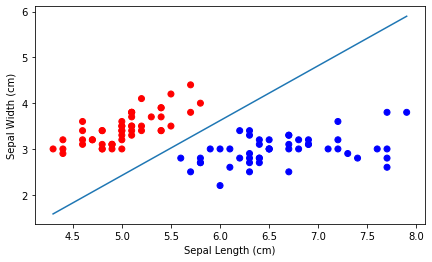

In [239]:
#plot the data
plt.figure(figsize=(7,4))
plt.scatter(new_iris.SepalLengthCm, new_iris.SepalWidthCm, c=[colour_map[i] for i in new_iris.Species])

#plot the decision boundary
x = np.array([min(new_iris.SepalLengthCm), max(new_iris.SepalLengthCm)])
plt.plot(x, grad*x + intercept)

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

Now we have completely specified the decision boudary, given the sepal length and sepal width of an unknown species of Iris flower we can attempt to classify it as either Setosa or Virginica.